**TODO:**
- use cases
- formal description
- choose dataset
- N classes => N classificators
- create graphs

# Logistische Regression mit Python

Ein ähnliches Konzept wurde im 2. Blogbeitrag als "lineares Modell für Klassifikation" vorgestellt. Dieses Konzept wird in diesem Blogbeitrag erweitert.

Es handelt sich um die logistische Regression. Das ist ein Modell für Regressionsanalyse, wobei die Abhängige Variable kategorisch ist. Das heißt, wir können dieses Modell für Klassifikation verwenden. Ein weiterer Vorteil der logistischen Regression ist, dass sie liefert auch die Wahrscheinlichkeit, dass eine Stichprobe zur ausgewählten Klasse gehört.

## Praktische Beispiele

- was
- was anders
**TODO**

## Formale Definition

Wie bei der linearen Regression sucht man geeignete Koeffiziente (*w*), so dass man das Modell mit der folgenden Formell beschreiben kann.

`y = w0 + w1*x1 + w2*x2 + ... + wn*xn`

Das liefert aber eine Zahl, die beliebig groß oder klein sein kann und gar nichts mit Wahrscheinlichkeiten zu tun hat. Wir brauchen eine Zahl zwischen 0 und 1 und zur Hilfe kommt hier die logistische Funktion. 

### Logistische Funktion

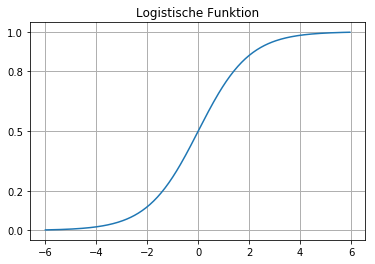

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# logistische Funktion plotten
t = np.arange(-6,6,0.05)
plt.plot(t, logistic(t))
plt.yticks([0, 0.2, 0.5, 0.8, 1])
plt.grid(linewidth=1)
plt.title("Logistische Funktion")
plt.show()

Die logistische Funktion ist als `1 / 1 + e^-x` definiert, wobei `e` die Eulersche Zahl ist (~2,71828...). Diese Zahl ist die Basis des natürlichen Logarithmus.

Es ist zu sehen, dass die Ausgabe der logistischen Funktion zwischen 0 und 1 beschränkt ist. Interessant ist auch, dass bei `x=0`, der Ausgabewert genau `0.5` ist.

**TODO**